In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [26]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [27]:
# Implementing UCB
N = 10000
d = 10
adsSelected = []
numbersOfSelection = [0] * d
sumsOfReward = [0] * d
totalReward = 0
for n in range(N):
    ad = 0
    maxUpperBound = 0
    for i in range(d):
        if (numbersOfSelection[i] > 0):
            averageReward = sumsOfReward[i] / numbersOfSelection[i]
            deltaI = math.sqrt(1.5 * math.log(n + 1) / numbersOfSelection[i])
            upperBound = averageReward + deltaI
        else:
            upperBound = 1e400
        if upperBound > maxUpperBound:
            maxUpperBound = upperBound
            ad = i
    adsSelected.append(ad)
    numbersOfSelection[ad] += 1
    reward = dataset.values[n, ad]
    sumsOfReward[ad] += reward
    totalReward += reward

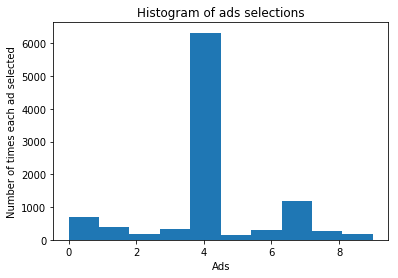

In [28]:
plt.hist(adsSelected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad selected')
plt.show()